# Main

## Model training

We will be investigating the same dataset as in HW1: *spambase.csv* from OpenML-100 databases. This database concerns emails, of which some were classified as spam emails (~39%), whereas the rest were work and personal emails.
We will be training a Random Forest Classifier as well as a linear regression.

Below are a 2 random entries of the dataframe and predictions of different models.

| Observation   | True label | RF prediction | Linear prediction |
|---------------|------------|---------------|-------------------|
| Observation 0 | 1          | 0.9490        | 0.5399            |
| Observation 1 | 1          | 0.9916        | 0.9467            |


As we can see, both RF and the linear model have predicted the true labels correctly. The linear model however is worse, and in one case almost wrong (Observation 0).

## Shap decompositions

### Random Forest

We have calculated the Shap decompositions on the 2 predictions of our Random Forest model. Below are graphs showing the Shap decomposition using dalex and shap.

#### Dalex

![chart1](https://raw.githubusercontent.com/AntekHanke/eXplainableMachineLearning-2024/main/Homeworks/HW4/AntoniHanke/dalex1.PNG "Chart1")

Comment:
1. As we can see, the most important variable differs between the 2 observations (*char_freq_21* vs *word_freq_remove*)
2. Variable *word_freq_24* has a positive attribution for observation 1 and a negative attribution for observation 0

#### Shap

![chart2](https://raw.githubusercontent.com/AntekHanke/eXplainableMachineLearning-2024/main/Homeworks/HW4/AntoniHanke/shap1.png "Chart2")

![chart3](https://raw.githubusercontent.com/AntekHanke/eXplainableMachineLearning-2024/main/Homeworks/HW4/AntoniHanke/shap2.png "Chart3")

Comment:
1. In the shap package, the same observations have their shapley explanations differ very slightly; The order of importance is more or less the same, only with minimal variations in importance

### Logistic regression model

We have trained a linear model on the same data and applied the dalex shapley decomposition to the same 2 observations as above:

![chart4](https://raw.githubusercontent.com/AntekHanke/eXplainableMachineLearning-2024/main/Homeworks/HW4/AntoniHanke/dalexlin.PNG "Chart4")

Comment:
1. The Shap attributions of this moddel differ from the RF model (even when using the same package dalex)
2. The order of importance of the variables is different as well as the variable attributions

# Part B

## Values for each coalition:
v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100

## Calculating Player A shapley value
We need to take into account all 3! permuations of {A, B, C} and calculate the player A contribution in each of them. Afterward we need to take the average and we will achieve player A shapley value.

Note: Player A contribution is shared between some cases, ex. ABC and ACB, player A contribution remains v(A)-v().


| Permutations | Player A contribution |
|--------------|-----------------------|
| ABC, ACB     | v(A)-v() = 20         |
| BAC          | v(A,B)-v(B) = 40      |
| CAB          | v(A,C)-v(C) = 10      |
| BCA, CBA     | v(A,B,C)-v(B,C) = 30  |

Finally Player A averaged contribution is:
$$\frac{20+20+40+10+30+30}{6} = 25$$


# Appendix
## Data preparation

In [2]:
import numpy as np
import pandas as pd
import dalex as dx
import lime

spambase = pd.read_csv("spambase.csv")

In [3]:
df = spambase.drop(spambase.columns[0], axis=1) #Cleaning first column which is just index

In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,TARGET
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,2.170000,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,1.000000


In [5]:
X = df.loc[:, df.columns != 'TARGET']

In [6]:
y = df.loc[:, df.columns == 'TARGET']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
kf = KFold(n_splits = 5)

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RF_final = RandomForestClassifier(n_estimators=200, max_depth = 8, max_features = 0.3, random_state = 1).fit(X, y)
print("Train accuracy: ", accuracy_score(y, RF_final.predict(X)))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train accuracy:  0.9565311888719844


### Dalex Shapley

In [27]:
RFexplainer = dx.Explainer(RF_final, X, y)

shap_attributions = [RFexplainer.predict_parts(X.iloc[[i]], type="shap", label=f'observation {i}') for i in range(2)]

Preparation of a new explainer is initiated

  -> data              : 4601 rows 55 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 4601 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001FB0AE50790> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0118, mean = 0.394, max = 0.992
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.902, mean = 7.09e-05, max = 0.947
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [28]:
shap_attributions[0].plot(shap_attributions[1::])

In [33]:
y.iloc[[0,1]]

,TARGET
0,1
1,1


In [42]:
for i in range(2):
    observation = X.iloc[[i]]
    print(RFexplainer.predict(observation))

[0.94896216]
[0.99157176]


### Shap explanations

In [30]:
import shap

In [34]:
shap_explainer = shap.explainers.Tree(RF_final, data=X, model_output="raw")

In [32]:
shap_values = shap_explainer(X)

100%|===================| 9161/9202 [01:30<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.022276, while the model output was 0.032270. If this difference is acceptable you can set check_additivity=False to disable this check.

In [35]:
shap_values

.values =
array([[[-1.45046660e-04,  1.45046677e-04],
        [-1.27395623e-03,  1.27395623e-03],
        [-6.09863437e-04,  6.09863386e-04],
        ...,
        [ 2.55196072e-02, -2.55196060e-02],
        [ 1.92350764e-04, -1.92350768e-04],
        [-9.02425648e-02,  9.02425644e-02]],

       [[ 3.99418960e-04, -3.99418960e-04],
        [-1.66786697e-04,  1.66786646e-04],
        [-2.26417626e-03,  2.26417626e-03],
        ...,
        [-8.86447478e-02,  8.86447459e-02],
        [ 8.09869075e-04, -8.09869126e-04],
        [-6.06022478e-02,  6.06022479e-02]],

       [[-5.47321330e-04,  5.47321335e-04],
        [-7.11505017e-05,  7.11505040e-05],
        [-1.62957010e-03,  1.62957005e-03],
        ...,
        [-8.84897266e-02,  8.84897243e-02],
        [ 2.22926367e-04, -2.22926374e-04],
        [-7.95046609e-02,  7.95046611e-02]],

       ...,

       [[-1.50896216e-04,  1.50896211e-04],
        [ 2.51259221e-04, -2.51259187e-04],
        [-4.88861260e-04,  4.88861256e-04],
        

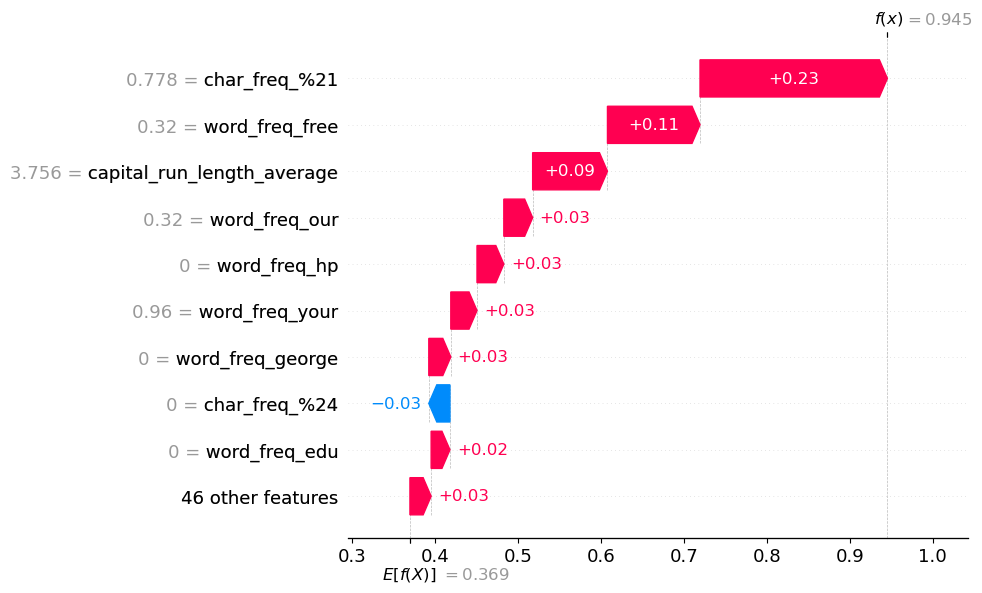

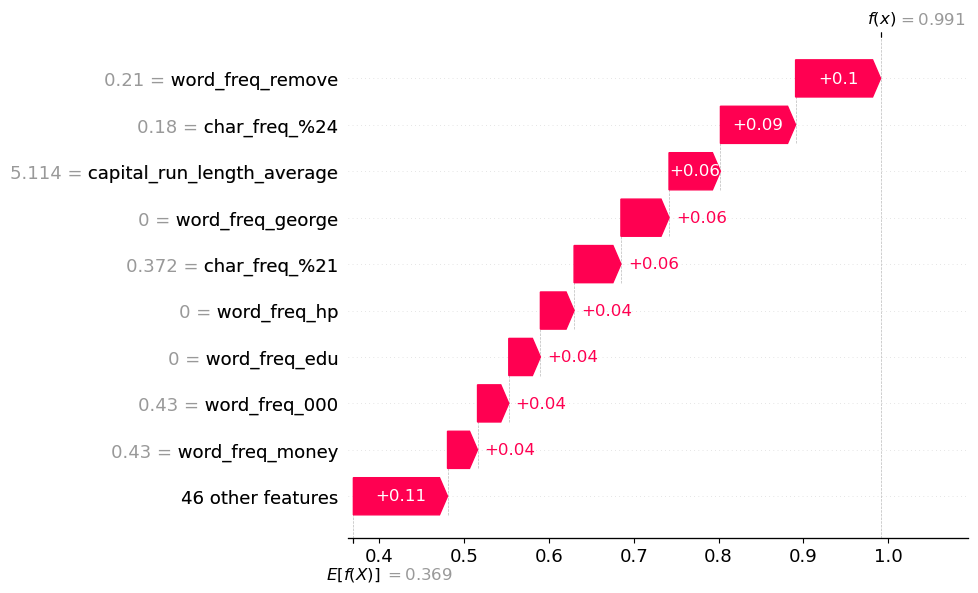

In [38]:
for i in range(2):
    shap.plots.waterfall(shap_values[i][:,1])

## Linear regression

In [39]:
from sklearn.linear_model import LogisticRegression
clf_final = LogisticRegression(random_state=2).fit(X, y)
print("Train accuracy: ", accuracy_score(y, clf_final.predict(X)))

Train accuracy:  0.930449902195175


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
clfexplainer = dx.Explainer(clf_final, X, y)

shap_attributions2 = [clfexplainer.predict_parts(X.iloc[[i]], type="shap", label=f'observation {i}') for i in range(2)]

Preparation of a new explainer is initiated

  -> data              : 4601 rows 55 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 4601 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001FB0AE50790> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 4.74e-58, mean = 0.394, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -5.19e-06, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [41]:
shap_attributions2[0].plot(shap_attributions2[1::])

In [43]:
for i in range(2):
    observation = X.iloc[[i]]
    print(clfexplainer.predict(observation))

[0.53986425]
[0.94669463]
